In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
1,2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
2,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700
3,2022-10-06,239.440002,244.580002,235.350006,238.130005,238.130005,69298400
4,2022-10-07,233.940002,234.570007,222.020004,223.070007,223.070007,83916800
...,...,...,...,...,...,...,...
245,2023-09-25,243.380005,247.100006,238.309998,246.990005,246.990005,104636600
246,2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600
247,2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200
248,2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900


In [6]:
df.shape

(250, 7)

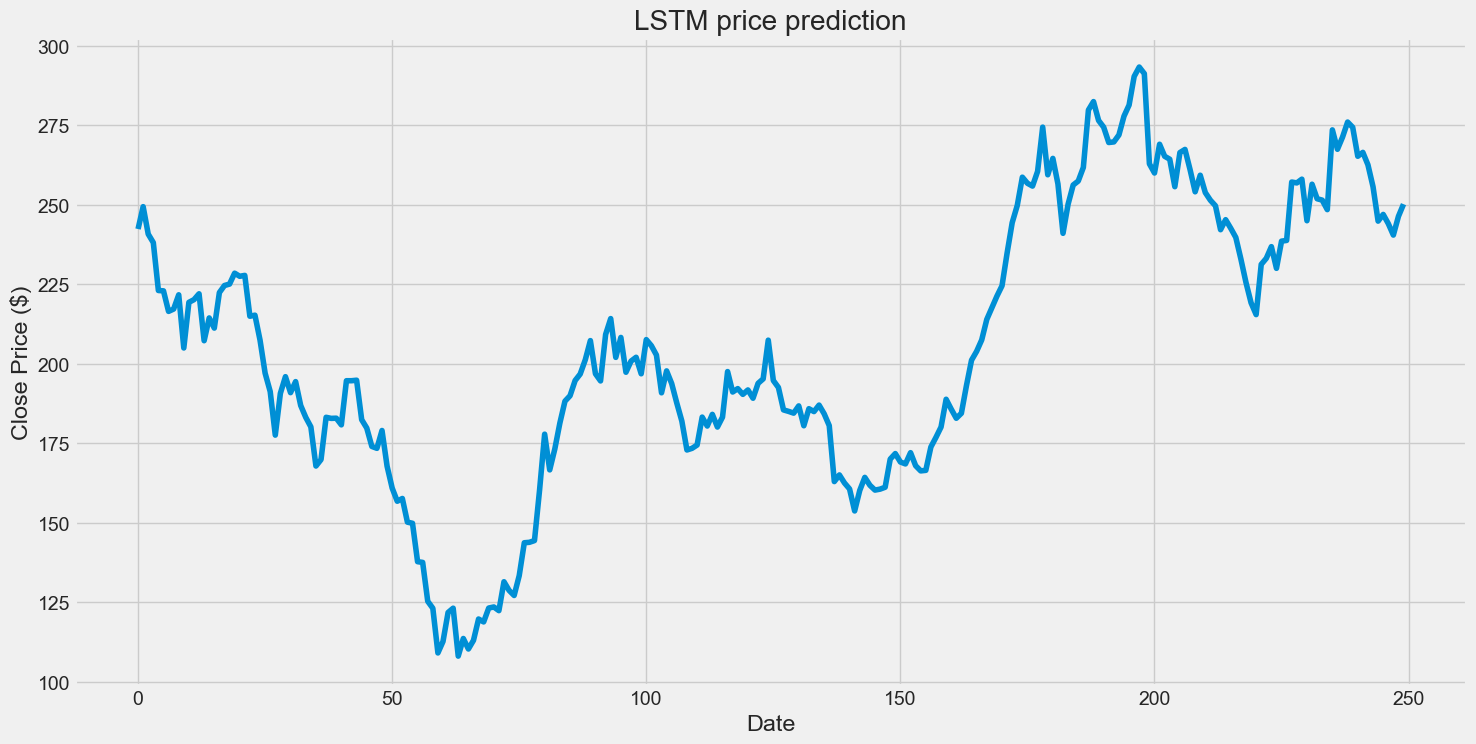

In [7]:
plt.figure(figsize=(16,8))
plt.title('LSTM price prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(df["Close"])
plt.show()

In [8]:
data=df.filter(['Close'])
dataset=data.values


In [9]:
training_data_len =math.ceil(len(dataset)*0.8)
training_data_len

200

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.72500538],
       [0.76301018],
       [0.71642195],
       [0.70195427],
       [0.62065434],
       [0.62006052],
       [0.5851868 ],
       [0.58918165],
       [0.61336647],
       [0.52305122],
       [0.60057228],
       [0.60510692],
       [0.61509391],
       [0.53541353],
       [0.5740661 ],
       [0.55684519],
       [0.61714533],
       [0.62912979],
       [0.63155905],
       [0.65007562],
       [0.64478512],
       [0.64629675],
       [0.57698121],
       [0.57876269],
       [0.53643924],
       [0.48034984],
       [0.44914708],
       [0.37513495],
       [0.446016  ],
       [0.47435761],
       [0.44725761],
       [0.46599007],
       [0.42550206],
       [0.40525805],
       [0.38917083],
       [0.32266248],
       [0.33367527],
       [0.40541999],
       [0.40358456],
       [0.40390845],
       [0.39262581],
       [0.46750162],
       [0.46750162],
       [0.46836539],
       [0.40137119],
       [0.38717345],
       [0.35597061],
       [0.352

In [11]:
train_data=scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<60:
    print(x_train)
    print(y_train)
    print()

In [12]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
x_train =np.reshape(x_train, newshape= (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(140, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, epochs=1, batch_size=1)

140/140 [==============================] - 9s 21ms/step - loss: 0.0198


In [17]:
test_data=scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
x_test =np.array(x_test)

In [19]:
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
     

2/2 [==============================] - 2s 35ms/step


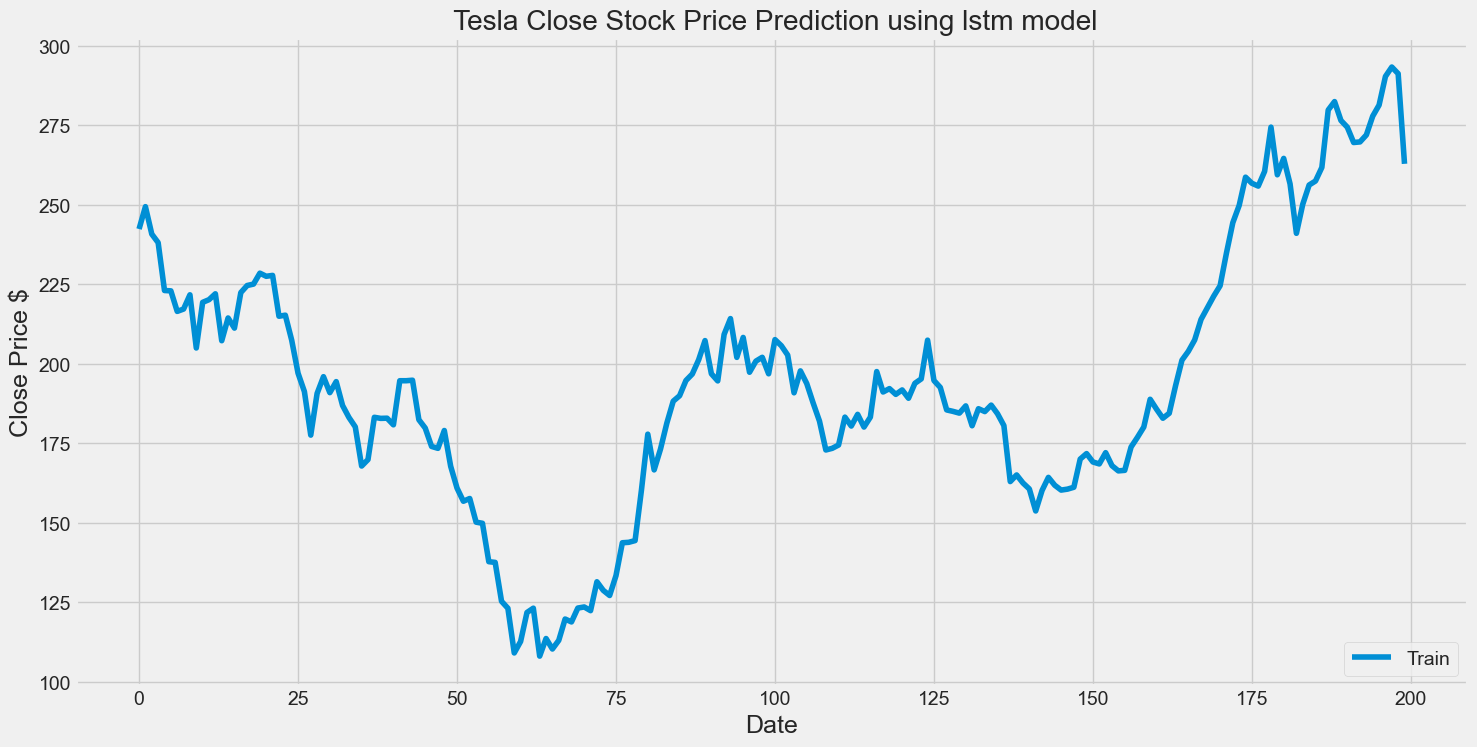

In [21]:
train=data[:training_data_len]
valid=data[training_data_len:]


plt.figure(figsize=(16,8))
plt.title(' Tesla Close Stock Price Prediction using lstm model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train', 'Val', 'Prediction'],loc ='lower right')
plt.show()